In [1]:
%pylab inline
plt.rc('font',size=20)

Populating the interactive namespace from numpy and matplotlib


## MCH example.

In [2]:
from solvers import *
from utils import *

calc_e,mchApproximation = define_ising_mch_helpers()

In [4]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)

p = random.rand(2**n)
p /= p.sum()

sample = allstates[random.choice(range(2**n),size=1000,replace=True,p=p)]
calc_observables = lambda s: pair_corr(s,concat=True)
sisj = calc_observables(sample)

In [5]:
# Declare and call solver.
solver = MCH(n,calc_e=calc_e,calc_observables=calc_observables,
             sample_size=100,sample_method='metropolis',mch_approximation=mchApproximation)
soln = solver.solve(sisj,maxiter=10)
soln = solver.solve(sisj,initial_guess=soln,maxiter=10,
                    learn_params_kwargs={'maxdlamda':.1,'eta':.1})
soln = solver.solve(sisj,initial_guess=soln,maxiter=20,
                    learn_params_kwargs={'maxdlamda':.05,'eta':.05})

Over maxiter
Over maxiter
Over maxiter


[<matplotlib.text.Text at 0x1168fe310>, <matplotlib.text.Text at 0x1166325d0>]

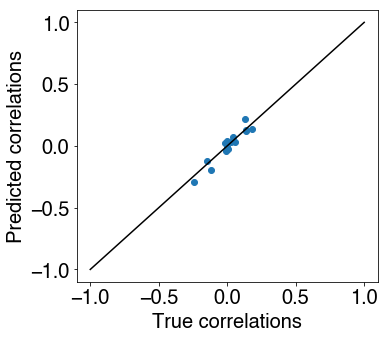

In [6]:
import ising_eqn_5_sym

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(soln),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

## MPF example.

In [7]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [9]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)

p = random.rand(2**n)
p /= p.sum()

sample = allstates[random.choice(range(2**n),size=100,replace=True,p=p)]
sisj = pair_corr(sample,concat=True)

In [10]:
# Declare and call solver.
solver = MPF(n,calc_e=calc_e)
soln = solver.solve(sample)

[<matplotlib.text.Text at 0x116e7f890>, <matplotlib.text.Text at 0x116e6ebd0>]

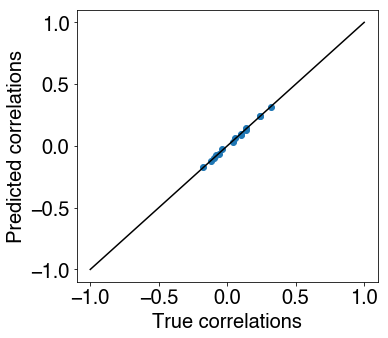

In [11]:
import ising_eqn_5_sym

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(soln[0]),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

## Exact example.

In [12]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [13]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)
def calc_observables(J):
    E = calc_e(allstates,J)
    return pair_corr( allstates, exp(-E-logsumexp(E)),concat=True )

p = random.rand(2**n)
p /= p.sum()

sisj = pair_corr(allstates,p,concat=True)

In [14]:
# Declare and call solver.
solver = Exact(n,constraints=sisj,calc_e=calc_e,calc_observables=calc_observables)
soln = solver.solve()

[<matplotlib.text.Text at 0x116f74c10>, <matplotlib.text.Text at 0x116e61d90>]

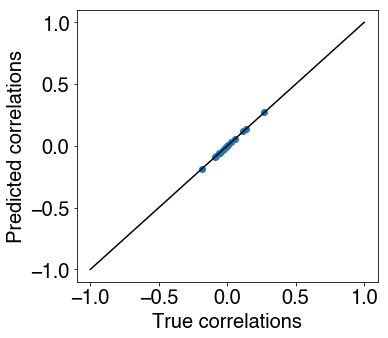

In [15]:
#from tosolve11 import tosolve5

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(soln['x']),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

# Pseudolikelihood

In [35]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [52]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)
def calc_observables(J):
    E = calc_e(allstates,J)
    return pair_corr( allstates, exp(-E-logsumexp(E)),concat=True )

multipliers = random.normal(scale=.5,size=n*(n-1)//2+n)
p = ising_eqn_5_sym.get_probs(multipliers)

sisj = pair_corr(allstates,p,concat=True)

In [57]:
samples = allstates[random.choice(range(2**n),size=1000,p=p)]

In [58]:
solver = Pseudo(n,calc_e=calc_e,calc_observables=calc_observables)

In [59]:
solver.solve(samples)

Minimizing for r = 0
Optimization terminated successfully.
         Current function value: 216.301278
         Iterations: 67
         Function evaluations: 90
         Gradient evaluations: 156
         Hessian evaluations: 67
Minimizing for r = 1
Optimization terminated successfully.
         Current function value: 559.735136
         Iterations: 179
         Function evaluations: 217
         Gradient evaluations: 395
         Hessian evaluations: 179
Minimizing for r = 2
Optimization terminated successfully.
         Current function value: 594.918089
         Iterations: 144
         Function evaluations: 175
         Gradient evaluations: 318
         Hessian evaluations: 144
Minimizing for r = 3
Optimization terminated successfully.
         Current function value: 125.878215
         Iterations: 111
         Function evaluations: 140
         Gradient evaluations: 250
         Hessian evaluations: 111
Minimizing for r = 4
Optimization terminated successfully.
         Current

array([ 1.06021806,  0.15350155, -0.25891148, -1.54734036, -0.09151864,
        0.22145293,  0.38060127, -0.25520996,  0.41939989, -0.45695261,
       -0.05767229, -0.42264386, -0.22962095, -0.19941384, -0.22742032])

[<matplotlib.text.Text at 0x10bc1b350>, <matplotlib.text.Text at 0x10f8c6f10>]

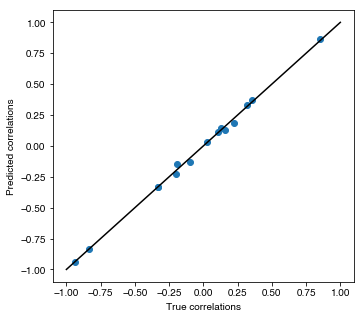

In [60]:
import ising_eqn_5_sym

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(solver.multipliers),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')